1.Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.

In [2]:
import pandas as pd


geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

dataset = pd.read_csv('./keywords.csv')

def check_region(keyword):
    parsed = keyword['keyword'].split(' ')
    for i in parsed:
        for key,values in geo_data.items():
            if i in values:
                return key
                break
            
dataset['region'] = dataset.apply(check_region, axis = 1)
dataset.sort_values('region').head()

,keyword,shows,region
38653,днс хабаровск интернет магазин,8845,Дальний Восток
21883,виндгуру владивосток,14254,Дальний Восток
21445,сахалин,14494,Дальний Восток
21406,монастырев интернет магазин владивосток,15108,Дальний Восток
28526,технопоинт хабаровск,11426,Дальний Восток


2.Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
    - оценка 2 и меньше - низкий рейтинг
    - оценка 4 и меньше - средний рейтинг
    - оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [8]:
ratings = pd.read_csv('./ratings.csv')


def movie_rating(ratings):
    if ratings['rating'] <= 2:
        return ('низкий рейтинг')
    elif ratings['rating'] <= 4:
        return ('средний рейтинг')
    else: return('высокий рейтинг')
        

ratings['class'] = ratings.apply(movie_rating, axis = 1)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,средний рейтинг
1,1,3,4.0,964981247,средний рейтинг
2,1,6,4.0,964982224,средний рейтинг
3,1,47,5.0,964983815,высокий рейтинг
4,1,50,5.0,964982931,высокий рейтинг


3.Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [80]:
from datetime import datetime as dt
ratings = pd.read_csv('./ratings.csv')

def time_to_day(user):
    """
    Принимает запись об оценке фильма
    Возвращает разницу между минимальной и максимальной датой оценки фильма пользователем
    """
    value_1 = dt.fromtimestamp(user['min'])
    value_2 = dt.fromtimestamp(user['max'])
    time_delta = value_2 - value_1
    return(time_delta.days)

agg_ratings = ratings.groupby(['userId']).agg({'rating' : ['count'],'timestamp' : ['min','max']})
agg_ratings['time_delta'] = agg_ratings.timestamp.apply(time_to_day, axis = 1)
mean_days = agg_ratings['time_delta'][agg_ratings.rating['count'] > 100].mean()
print('Среднее значение Lifetime киноманов - {:.0f} дней'.format(mean_days))

Среднее значение Lifetime киноманов - 517 дней


4.Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из материалов занятия. Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv('./movies.csv')
ratings = pd.read_csv('./ratings.csv')

years = list(range(1950,2020))

def movie_year(movie):
    for i in years:
        if str(i) in movie['title']:
            return(i)
    return(1900)

years = list(range(1950,2020))
movies['year'] = movies.apply(movie_year, axis = 1)
#mean_rating['mean_rating'] = ratings.groupby('movieId')['rating'].agg('mean')
mean_rating = ratings.groupby(['movieId'])['rating'].mean().reset_index()
movies = movies.merge(mean_rating, on = 'movieId', how = 'left')
movies_mean_rating = movies.groupby(['year'])['rating'].mean().reset_index()
movies_mean_rating.sort_values(['year']).head()


,year,rating
0,1900,3.611822
1,1950,3.501464
2,1951,3.718044
3,1952,3.700104
4,1953,3.586757


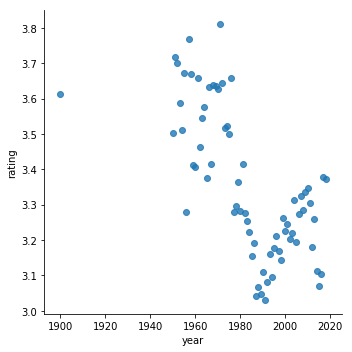

In [181]:
sns.lmplot('year', 'rating', data=movies_mean_rating, fit_reg=False)